# 統計基本量

In [1]:
import numpy as np

In [2]:
ls

ArrayCalculation.ipynb          Random.ipynb
BasicofNumpy.ipynb              SparseMatrix.ipynb
LinearAlgebra.ipynb             Statistics.ipynb
MathematicalOptimization.ipynb  VisualizeData.ipynb
NumericalCalculation.ipynb      data.csv
README.md


In [36]:
data = np.array([])
with open("data.csv", encoding='shift_jis') as file:
    lines = file.readlines()
    for line in lines:
        items = line.split(",")
        if(len(items)>1 and '/' in line.split(",")[0] ):
            print(line.split(",")[0], line.split(",")[1])
            data = np.append(data, float(line.split(",")[1]))
print(data, type(data))

2018/4/1 21.9
2018/4/2 24.5
2018/4/3 23.4
2018/4/4 26.2
2018/4/5 15.3
2018/4/6 22.4
2018/4/7 21.8
2018/4/8 16.8
2018/4/9 19.9
2018/4/10 19.1
2018/4/11 21.9
2018/4/12 25.9
2018/4/13 20.9
2018/4/14 18.8
2018/4/15 22.1
2018/4/16 20.0
2018/4/17 15.0
2018/4/18 16.0
2018/4/19 22.2
2018/4/20 26.4
2018/4/21 26.0
2018/4/22 28.3
2018/4/23 18.7
2018/4/24 21.3
2018/4/25 22.5
2018/4/26 25.0
2018/4/27 22.0
2018/4/28 26.1
2018/4/29 25.6
2018/4/30 25.7
[21.9 24.5 23.4 26.2 15.3 22.4 21.8 16.8 19.9 19.1 21.9 25.9 20.9 18.8
 22.1 20.  15.  16.  22.2 26.4 26.  28.3 18.7 21.3 22.5 25.  22.  26.1
 25.6 25.7] <class 'numpy.ndarray'>


In [21]:
mean = data.sum() / len(data)
sigma = np.sqrt(((data - mean)**2).sum() / len(data))

In [25]:
print("mean:{:.8f}".format(mean))
print("sigma:{:.8f}".format(sigma))

mean:22.05666667
sigma:3.49081493


In [28]:
print(data.mean())
print(data.std())

22.05666666666667
3.490814931916169


In [56]:
data2 = np.array([])
with open("data2.csv") as file:
    lines = file.readlines()
    for index, line in enumerate(lines):
        items = line.split(",")
        if index==0:
            continue
        if(len(items)==4 and '/' in line.split(",")[0] ):
            print(line.split(",")[0], line.split(",")[1])
            data2 = np.append(data2, float(line.split(",")[1]))
print(data2, type(data2))

2018/4/1 8.3
2018/4/2 13.0
2018/4/3 8.4
2018/4/4 7.9
2018/4/5 7.0
2018/4/6 3.7
2018/4/7 6.1
2018/4/8 8.5
2018/4/9 8.6
2018/4/10 11.9
2018/4/11 12.1
2018/4/12 14.4
2018/4/13 7.0
2018/4/14 10.5
2018/4/15 6.6
2018/4/16 10.6
2018/4/17 16.6
2018/4/18 19.1
2018/4/19 20.1
2018/4/20 19.8
2018/4/21 24.5
2018/4/22 12.6
2018/4/23 16.4
2018/4/24 13.0
2018/4/25 13.3
2018/4/26 14.1
2018/4/27 14.4
2018/4/28 17.0
2018/4/29 21.3
2018/4/30 24.5
[ 8.3 13.   8.4  7.9  7.   3.7  6.1  8.5  8.6 11.9 12.1 14.4  7.  10.5
  6.6 10.6 16.6 19.1 20.1 19.8 24.5 12.6 16.4 13.  13.3 14.1 14.4 17.
 21.3 24.5] <class 'numpy.ndarray'>


In [61]:
mean_y = data2.mean()
sigma_y =data2.std()

In [67]:
sxy = ((data - mean)*(data2-mean_y)).sum() /len(data)
print("共分散：", sxy)
print("相関係数:", sxy / (sigma * sigma_y))

共分散： 5.487211111111111
相関係数: 0.2897289700420625


# 正規分布と確率密度関数

In [68]:
import matplotlib.pyplot as plt
from scipy.stats import norm

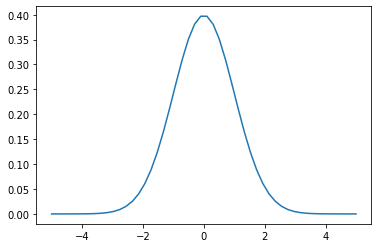

In [71]:
x = np.linspace(-5, 5)
y= norm.pdf(x)
plt.plot(x,y)

$\mu$と $\sigma$の値を指定

In [72]:
y = norm.pdf(x, loc=1, scale=2)

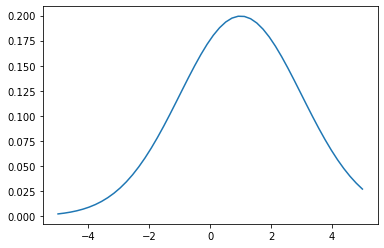

In [74]:
plt.plot(x,y)

正規分布に従う確率変数$X$がある範囲[a, b] に入る確率$P(a\leq X \leq b)$を計算
累積分布関数は正規分布だけでなく一般の確率密度関数fに対して以下のように定義できる。
$$
    F(x) = \int_{-\infty}^{x} f(t)dt
$$
確率分布がfに従う確率変数$X$とすると
$$
    F(x) = P(X\leq x)
$$
となる。
正規分布に従う確率変数$X$がある範囲[a, b] に入る確率$P(a\leq X \leq b)$は
$$
    \begin{array}
    P(a\leq X \leq b) &= \int_a^b f(x)dx \\
    &= \int_{-\infty}^b f(x)dx - \int_{-\infty}^a f(x)dx \\
    &= F(b) - F(a)
    \end{array}
$$

In [75]:
from scipy.stats import norm

In [77]:
norm.cdf(1) - norm.cdf(-1)

0.6826894921370859

In [78]:
def cointoss(n, m):
    l = []
    for _ in range(m):
        r = np.random.randint(2, size=n)
        l.append(r.sum())
    return l

(array([2.5000e+01, 6.2000e+01, 1.0400e+02, 1.8100e+02, 2.6200e+02,
        4.6800e+02, 8.4600e+02, 1.1770e+03, 1.8990e+03, 2.8920e+03,
        4.2530e+03, 6.0960e+03, 8.4180e+03, 1.1736e+04, 1.5214e+04,
        2.0136e+04, 2.5054e+04, 3.0817e+04, 3.6830e+04, 4.3149e+04,
        4.8810e+04, 5.4168e+04, 5.8673e+04, 6.2014e+04, 6.3448e+04,
        6.4000e+04, 6.1931e+04, 5.8696e+04, 5.4425e+04, 4.9232e+04,
        4.3784e+04, 3.7302e+04, 3.1669e+04, 2.5877e+04, 2.0436e+04,
        1.5866e+04, 1.1979e+04, 8.8530e+03, 6.3930e+03, 4.3760e+03,
        3.0220e+03, 2.0510e+03, 1.3400e+03, 7.9900e+02, 5.1400e+02,
        2.8800e+02, 1.9200e+02, 9.2000e+01, 5.5000e+01, 3.8000e+01]),
 array([4800., 4808., 4816., 4824., 4832., 4840., 4848., 4856., 4864.,
        4872., 4880., 4888., 4896., 4904., 4912., 4920., 4928., 4936.,
        4944., 4952., 4960., 4968., 4976., 4984., 4992., 5000., 5008.,
        5016., 5024., 5032., 5040., 5048., 5056., 5064., 5072., 5080.,
        5088., 5096., 5104., 5112.

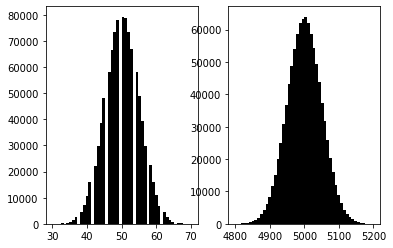

In [81]:
np.random.seed(0)
fig, axes = plt.subplots(1, 2)
l = cointoss(100, 1000000)
axes[0].hist(l, range=(30, 70), bins=50, color="k")
l = cointoss(10000, 1000000)
axes[1].hist(l, range=(4800, 5200), bins=50, color="k")

確率変数についての平均と分散
確率変数$X$について、平均(期待値)は$E(X)$で表される
Xが離散型の場合
$$
    E(X) = \sum_{i=1}^{n} a_i P(X=a_i)
$$
Xが連続型の場合
$$
    E(X) = \int_{-\infty}^{\infty} x P(X=x)dx
$$